In [41]:
import pandas as pd
import numpy as np


In [42]:
df = pd.read_csv('data/stud.csv')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
x = df.drop('math_score', axis=1 )
y = df['math_score']

In [46]:
num_features = x.select_dtypes(exclude='object').columns.tolist()
cat_features = x.select_dtypes(include='object').columns.tolist()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, num_features),
        ('categorical', one_transformer, cat_features)
    ]
)

In [47]:
x = preprocessor.fit_transform(x)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, mae, r2


In [50]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
}   

model_list = []
r2_list = []

for i in models:
    model = models[i]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse, mae, r2 = evaluate_model(y_test, y_pred)
    model_list.append(i)
    r2_list.append(r2)
    print(f"{i} -- MSE: {mse}, MAE: {mae}, R2: {r2}")

Linear Regression -- MSE: 29.095169866715466, MAE: 4.214763142474849, R2: 0.8804332983749565
Ridge Regression -- MSE: 29.05627219234827, MAE: 4.211100688014259, R2: 0.880593148502874
Lasso Regression -- MSE: 42.506332351273414, MAE: 5.157879138921815, R2: 0.8253200795629732
KNeighbors Regressor -- MSE: 52.617, MAE: 5.619, R2: 0.7837702557426202
Decision Tree Regressor -- MSE: 59.96, MAE: 6.17, R2: 0.753594171737794
Support Vector Regressor -- MSE: 66.04200493745648, MAE: 5.401539244496997, R2: 0.7286001513223705
Random Forest Regressor -- MSE: 36.841444156250006, MAE: 4.732620833333334, R2: 0.8485999572765746
Gradient Boosting Regressor -- MSE: 31.10983214873394, MAE: 4.305294556586417, R2: 0.8721540367293698
XGBoost Regressor -- MSE: 43.50392150878906, MAE: 5.1036295890808105, R2: 0.8212205171585083


In [51]:
pd.DataFrame({'Model': model_list, 'R2 Score': r2_list})

,Model,R2 Score
0,Linear Regression,0.880433
1,Ridge Regression,0.880593
2,Lasso Regression,0.825320
3,KNeighbors Regressor,0.783770
4,Decision Tree Regressor,0.753594
5,Support Vector Regressor,0.728600
6,Random Forest Regressor,0.848600
7,Gradient Boosting Regressor,0.872154
8,XGBoost Regressor,0.821221


In [52]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
mse, mae, r2 = evaluate_model(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Linear Regression -- MSE: {mse}, MAE: {mae}, R2: {r2}")


Linear Regression -- MSE: 29.095169866715466, MAE: 4.214763142474849, R2: 0.8804332983749565


In [54]:
from matplotlib import pyplot as plt

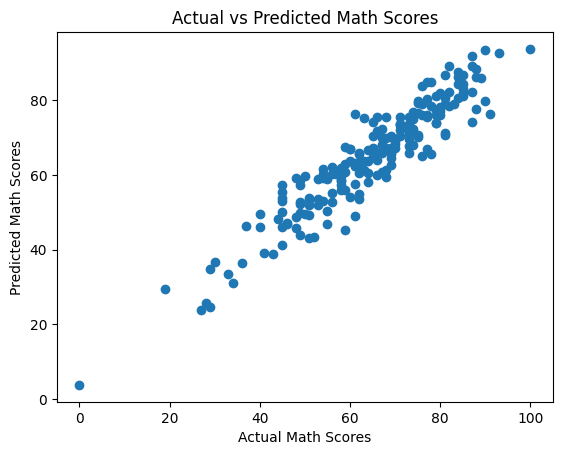

In [55]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

<Axes: xlabel='math_score'>

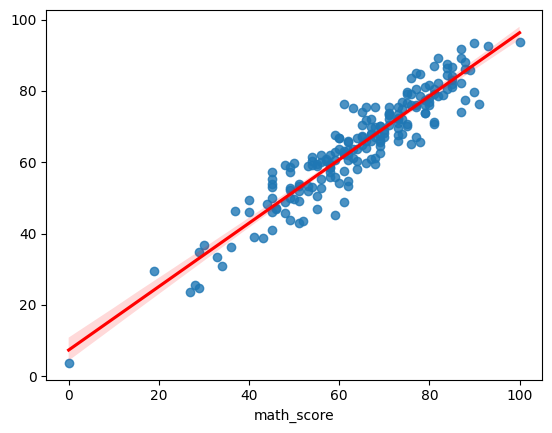

In [56]:
import seaborn as sns

sns.regplot(x=y_test, y=y_pred, line_kws={"color":"red"})